In [1]:
import os
from os.path import dirname

root_dir = dirname(os.getcwd())
os.chdir(root_dir)

In [2]:
import yaml
import random
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('data/configs/weather_data_params.yaml', 'r') as file:
    location_params = yaml.safe_load(file)

In [4]:
location_list = list(location_params['location'].keys())

In [5]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [6]:
from src.nn.models import DengueNN

In [7]:
device = 'cpu'

Processing location: bello


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Best Loss: 0.0263


/tmp/ipykernel_46596/850703524.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_data_tensor_normalized = torch.tensor(true_data, dtype=torch.float32)


Processing location: iquitos


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Best Loss: 0.0459


/tmp/ipykernel_46596/850703524.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_data_tensor_normalized = torch.tensor(true_data, dtype=torch.float32)


Processing location: sanjuan


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Best Loss: 0.0302


/tmp/ipykernel_46596/850703524.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_data_tensor_normalized = torch.tensor(true_data, dtype=torch.float32)


Processing location: vietnam


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Best Loss: 0.0292


/tmp/ipykernel_46596/850703524.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_data_tensor_normalized = torch.tensor(true_data, dtype=torch.float32)


Processing location: philippines


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Best Loss: 0.0289


/tmp/ipykernel_46596/850703524.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_data_tensor_normalized = torch.tensor(true_data, dtype=torch.float32)


Processing location: cambodia


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Best Loss: 0.0430


/tmp/ipykernel_46596/850703524.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_data_tensor_normalized = torch.tensor(true_data, dtype=torch.float32)


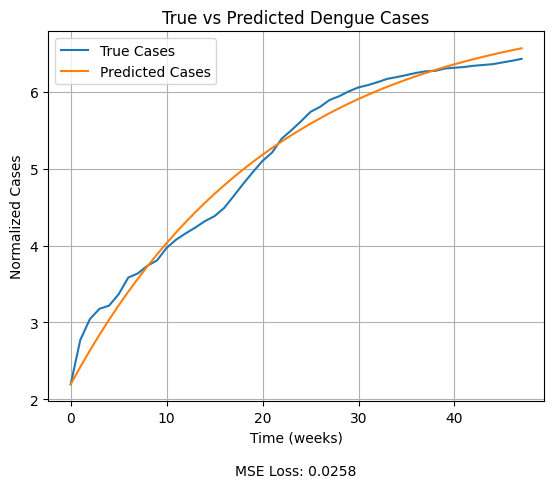

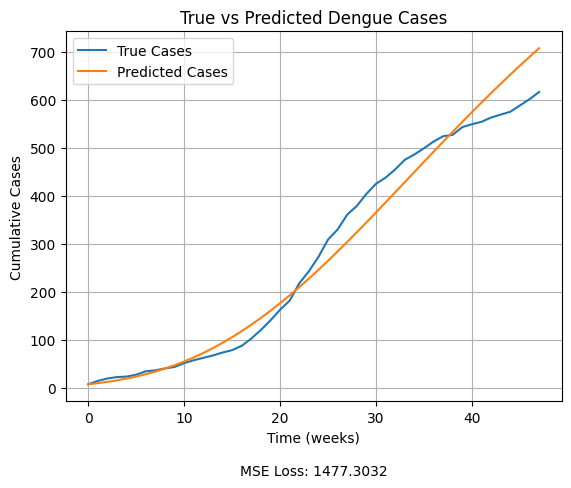

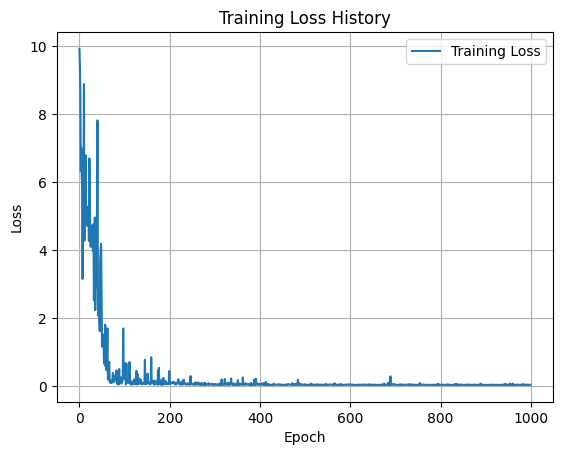

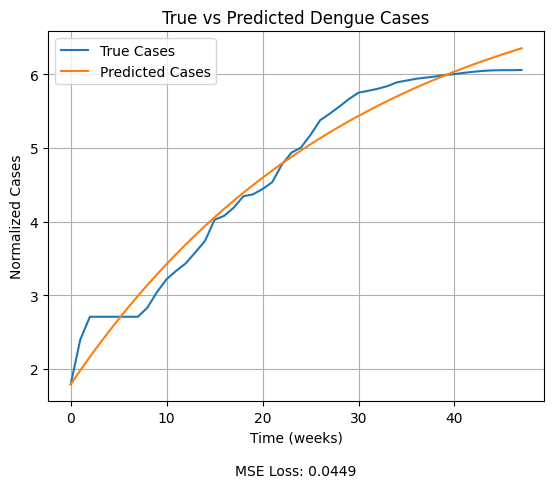

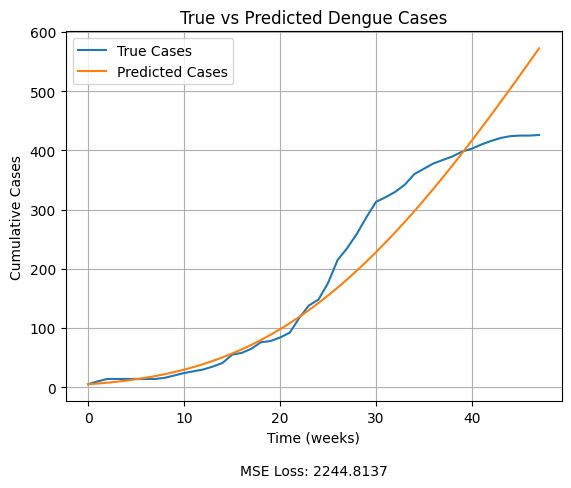

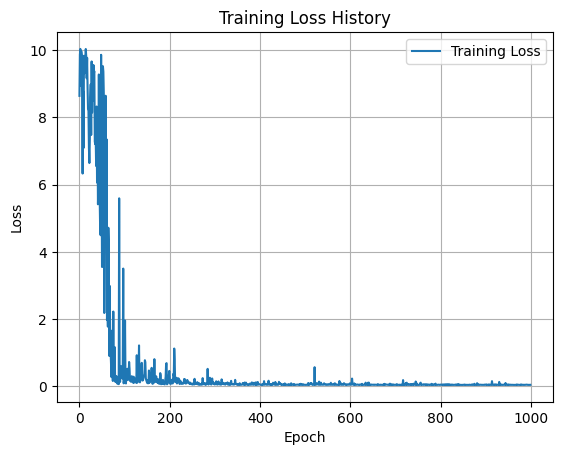

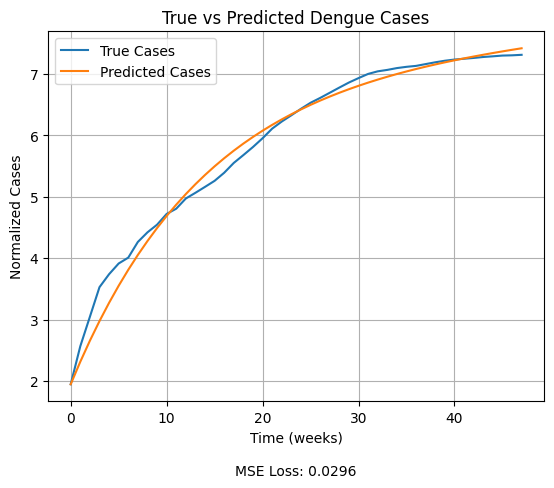

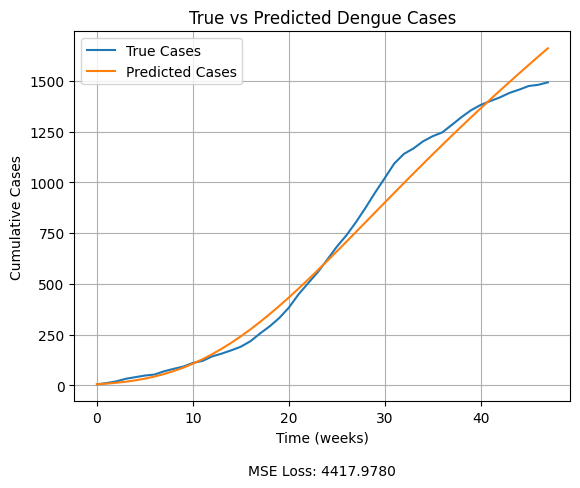

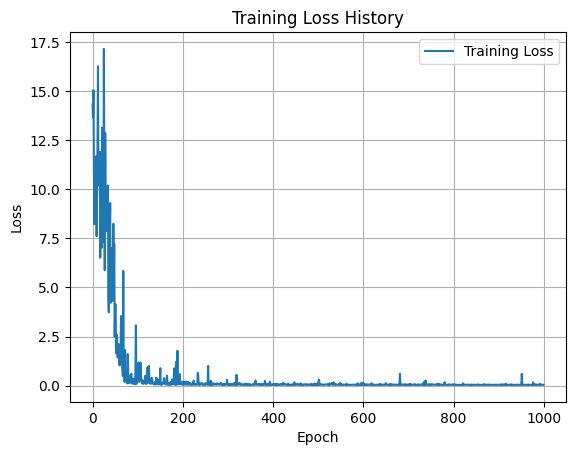

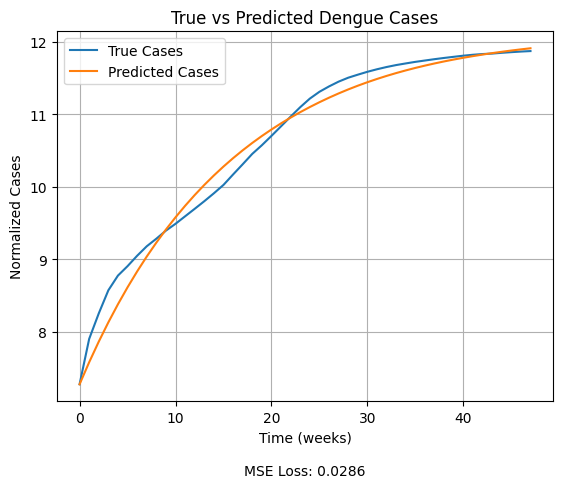

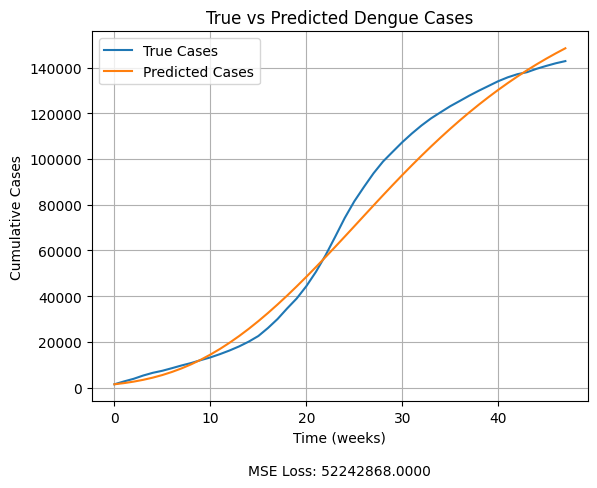

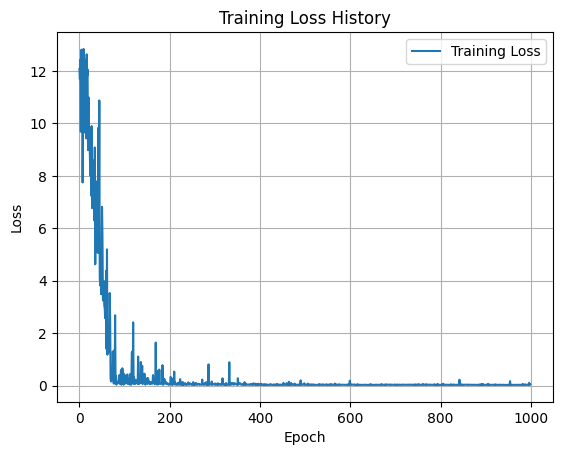

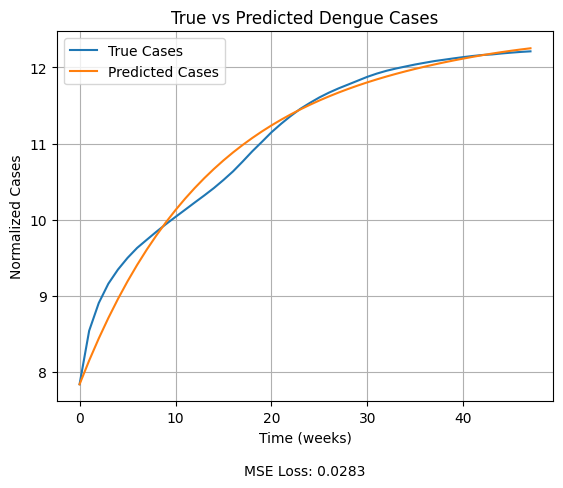

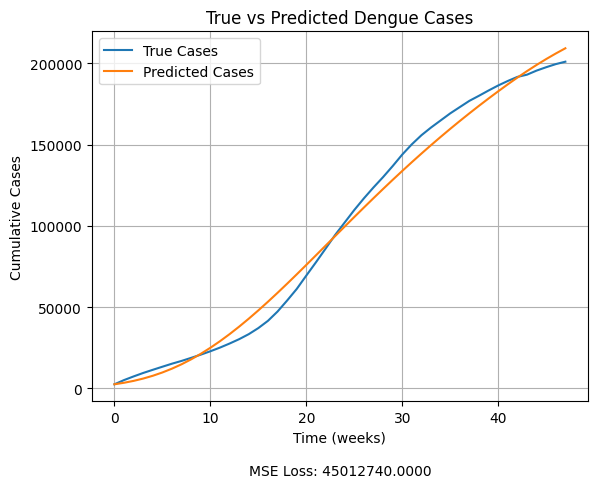

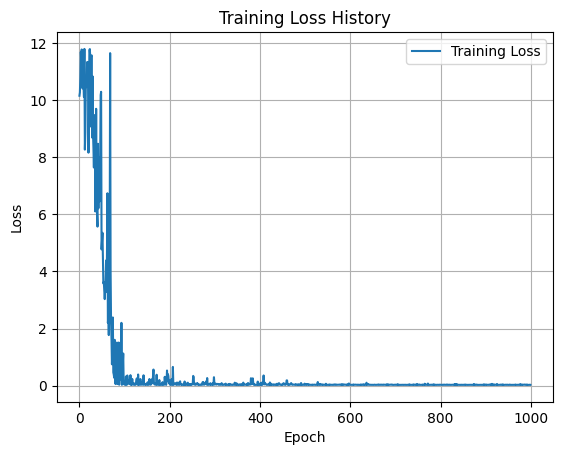

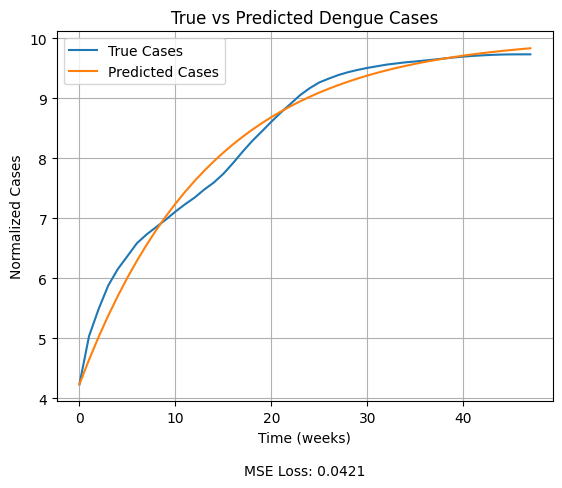

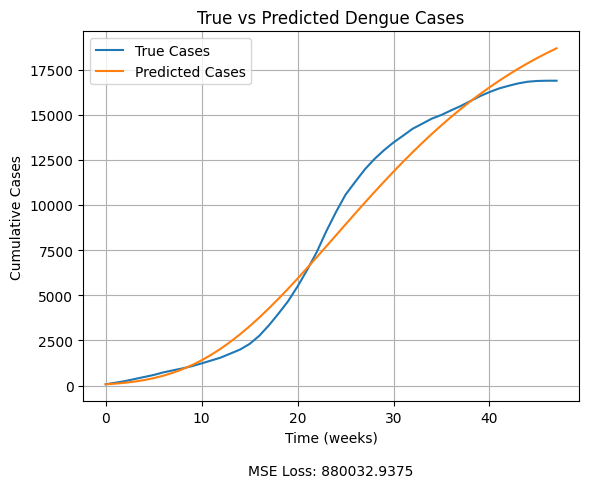

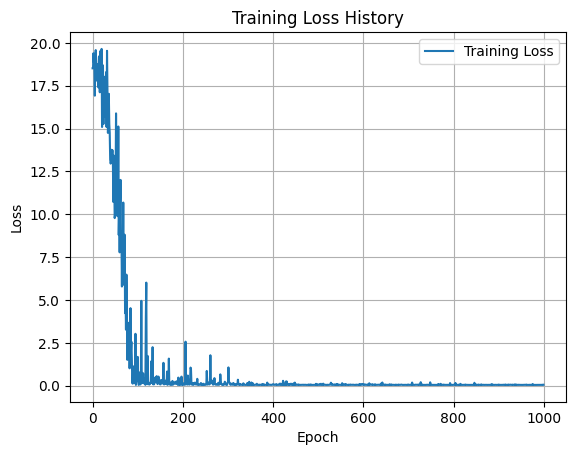

In [8]:
for location in location_list:
    print(f'Processing location: {location}')
    nn = DengueNN(
        device=device,
        location=location,
        data_csv_path=f'data/calibration/{location}/data.csv',
        params_yaml_path=f'data/configs/params.yaml',
        lr=1e-2,
        epochs=1000,
        hidden_dim=32,
        hidden_num=3,
    )
    true_data = nn.cumulative_cases
    hist, pred_data = nn.train()

    true_data_tensor_normalized = torch.tensor(true_data, dtype=torch.float32)
    pred_data_tensor_normalized = torch.tensor(
        pred_data, dtype=torch.float32).unsqueeze(-1)

    criterion = torch.nn.MSELoss()
    loss_normalized = criterion(
        pred_data_tensor_normalized, true_data_tensor_normalized)
    loss_normalized = float(loss_normalized.detach().cpu().numpy())

    true_data_tensor = true_data_tensor_normalized.expm1()
    pred_data_tensor = pred_data_tensor_normalized.expm1()

    loss = criterion(pred_data_tensor, true_data_tensor)
    loss = float(loss.detach().cpu().numpy())

    fig1, ax1_fig1 = plt.subplots()
    ax1_fig1.plot(true_data_tensor_normalized, label='True Cases')
    ax1_fig1.plot(pred_data_tensor_normalized, label='Predicted Cases')
    ax1_fig1.set_xlabel('Time (weeks)')
    ax1_fig1.set_ylabel('Normalized Cases')
    ax1_fig1.set_title('True vs Predicted Dengue Cases')
    ax1_fig1.text(0.5, -0.2, f'MSE Loss: {loss_normalized:.4f}',
                  transform=ax1_fig1.transAxes, ha='center')
    ax1_fig1.legend()
    ax1_fig1.grid(True)

    fig2, ax1_fig2 = plt.subplots()
    ax1_fig2.plot(true_data_tensor, label='True Cases')
    ax1_fig2.plot(pred_data_tensor, label='Predicted Cases')
    ax1_fig2.set_xlabel('Time (weeks)')
    ax1_fig2.set_ylabel('Cumulative Cases')
    ax1_fig2.set_title('True vs Predicted Dengue Cases')
    ax1_fig2.text(
        0.5, -0.2, f'MSE Loss: {loss:.4f}', transform=ax1_fig2.transAxes, ha='center')
    ax1_fig2.legend()
    ax1_fig2.grid(True)

    fig3, ax1_fig3 = plt.subplots()
    ax1_fig3.plot(hist, label='Training Loss')
    ax1_fig3.set_xlabel('Epoch')
    ax1_fig3.set_ylabel('Loss')
    ax1_fig3.set_title('Training Loss History')
    ax1_fig3.legend()
    ax1_fig3.grid(True)

    fig1.savefig(
        f'results/{location}/normalized_cases.png', bbox_inches='tight')
    fig2.savefig(
        f'results/{location}/cumulative_cases.png', bbox_inches='tight')
    fig3.savefig(f'results/{location}/training_loss.png', bbox_inches='tight')

In [9]:
# nn = DengueNN(
#     device=device,
#     location=location,
#     data_csv_path=f'data/calibration/{location}/data.csv',
#     params_yaml_path=f'data/configs/params.yaml',
#     lr=1e-2,
#     epochs=1000,
#     hidden_dim=32,
#     hidden_num=3,
# )

In [10]:
# true_data = nn.cumulative_cases
# hist, pred_data = nn.train()

In [11]:
# true_data_tensor_normalized = torch.tensor(true_data, dtype=torch.float32)
# pred_data_tensor_normalized = torch.tensor(pred_data, dtype=torch.float32).unsqueeze(-1)

# criterion = torch.nn.MSELoss()
# loss_normalized = criterion(pred_data_tensor_normalized, true_data_tensor_normalized)
# loss_normalized = float(loss_normalized.detach().cpu().numpy())

In [12]:
# true_data_tensor = true_data_tensor_normalized.expm1()
# pred_data_tensor = pred_data_tensor_normalized.expm1()

# loss = criterion(pred_data_tensor, true_data_tensor)
# loss = float(loss.detach().cpu().numpy())

In [13]:
# fig1, ax1_fig1 = plt.subplots()
# ax1_fig1.plot(true_data_tensor_normalized, label='True Cases')
# ax1_fig1.plot(pred_data_tensor_normalized, label='Predicted Cases')
# ax1_fig1.set_xlabel('Time (weeks)')
# ax1_fig1.set_ylabel('Normalized Cases')
# ax1_fig1.set_title('True vs Predicted Dengue Cases')
# ax1_fig1.text(0.5, -0.2, f'MSE Loss: {loss_normalized:.4f}', transform=ax1_fig1.transAxes, ha='center')
# ax1_fig1.legend()
# ax1_fig1.grid(True)
# plt.show()

In [14]:
# fig2, ax1_fig2 = plt.subplots()
# ax1_fig2.plot(true_data_tensor, label='True Cases')
# ax1_fig2.plot(pred_data_tensor, label='Predicted Cases')
# ax1_fig2.set_xlabel('Time (weeks)')
# ax1_fig2.set_ylabel('Cumulative Cases')
# ax1_fig2.set_title('True vs Predicted Dengue Cases')
# ax1_fig2.text(0.5, -0.2, f'MSE Loss: {loss:.4f}', transform=ax1_fig2.transAxes, ha='center')
# ax1_fig2.legend()
# ax1_fig2.grid(True)
# plt.show()

In [15]:
# fig3, ax1_fig3 = plt.subplots()
# ax1_fig3.plot(hist, label='Training Loss')
# ax1_fig3.set_xlabel('Epoch')
# ax1_fig3.set_ylabel('Loss')
# ax1_fig3.set_title('Training Loss History')
# ax1_fig3.legend()
# ax1_fig3.grid(True)
# plt.show()

In [16]:
# fig1.savefig(f'results/{location}/normalized_cases.png', bbox_inches='tight')
# fig2.savefig(f'results/{location}/cumulative_cases.png', bbox_inches='tight')
# fig3.savefig(f'results/{location}/training_loss.png', bbox_inches='tight')